In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
data_teste = pd.read_csv("data/teste_normalized.csv")
data_treino = pd.read_csv("data/train_normalized.csv")

### SEPARING THE DATA

In [3]:
X_train = data_treino.drop(columns="label")
y_train = data_treino.label

print(X_train.shape)
y_train.shape

(2620, 9)


(2620,)

In [4]:
X_test = data_teste.drop(columns="label")
y_test = data_teste.label
print(X_test.shape)
y_test.shape

(656, 9)


(656,)

## Balanceando o dataset (Oversampling: SMOTE)

In [5]:
y_train.value_counts()

0    1586
1    1034
Name: label, dtype: int64

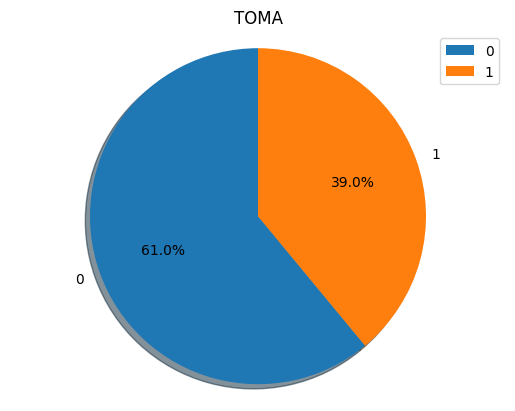

In [6]:
labels = '0', '1'
sizes = round((y_train.value_counts()/X_train.shape[0])*100)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("TOMA")
plt.legend() #["blue", "orange"], loc ="lower right"
plt.show()

In [7]:
sm = SMOTE(random_state= 2022)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

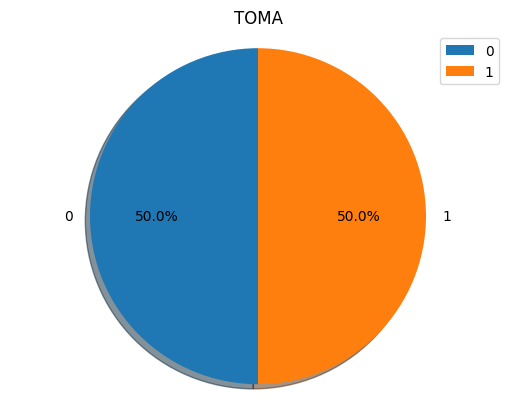

In [8]:
labels = '0', '1'
sizes = round((y_train_sm.value_counts()/X_train_sm.shape[0])*100)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("TOMA")
plt.legend() #["blue", "orange"], loc ="lower right"
plt.show()

## PCA 


In [9]:
pca = PCA(n_components= 1)
pca.fit(X = X_train, y = y_train)
print("variancia:",np.round(pca.explained_variance_ratio_,5))
X_train_pca = pca.transform(X = X_train)
X_test_pca = pca.transform(X = X_test)


variancia: [0.99999]


### 
Para definir o n_components deve-se observar os resultados da variancia e somar os primeiro valores ate compor 95% se tiver poucos atributos e se tiver muitos atributos deve se buscar 98%

In [10]:
data_train_pca = pd.DataFrame(X_train_pca, columns=["PCA_1"])
data_train_pca['label'] = y_train.to_list()
data_train_pca

,PCA_1,label
0,-1309.500015,0
1,-1308.499933,0
2,-1307.500033,0
3,-1306.500072,0
4,-1305.500050,0
...,...,...
2615,1305.499906,1
2616,1306.500015,1
2617,1307.500101,0
2618,1308.499954,0


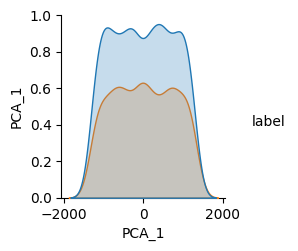

In [11]:
sns.pairplot(data = data_train_pca,hue= "label")

## PCA COM SMOTE

In [12]:
pca = PCA(n_components= 1)
pca.fit(X = X_train_sm, y = y_train_sm)
print("variancia:",np.round(pca.explained_variance_ratio_,5))
X_train_pca_sm = pca.transform(X = X_train_sm)
X_test_pca_sm = pca.transform(X = X_test)

variancia: [0.99999]


In [13]:
data_train_pca_sm = pd.DataFrame(X_train_pca_sm, columns=["PCA_1"])
data_train_pca_sm['label'] = y_train_sm.to_list()
data_train_pca_sm

,PCA_1,label
0,1311.917722,0
1,1310.917702,0
2,1309.917747,0
3,1308.917791,0
4,1307.917746,0
...,...,...
3167,121.917755,1
3168,-1117.082282,1
3169,-748.082319,1
3170,-972.082245,1


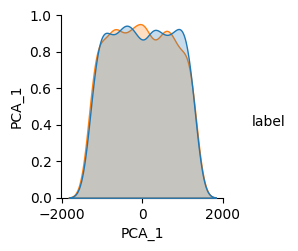

In [14]:
sns.pairplot(data = data_train_pca_sm,hue= "label")

### TSNE 

In [15]:
X_train

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.317377,0.202046,-0.554634,-0.666527,-0.199296,0.506221,-0.084315,-1.341104
1,1,-0.275606,-0.080066,1.368736,1.743813,0.882586,-1.654207,0.019075,0.090829
2,2,-0.172103,0.283021,-0.423990,-0.248791,0.838486,-0.134860,0.274997,1.274183
3,3,-0.004751,-0.397879,-1.063086,1.681607,0.690172,-0.286851,-1.230971,-0.923584
4,4,-0.465638,-0.416413,-0.477227,0.223520,-0.340518,0.928554,-0.144336,0.788260
...,...,...,...,...,...,...,...,...,...
2615,2615,-1.983229,0.366111,-0.029081,-0.794690,-1.994638,-0.918494,-1.241751,0.812639
2616,2616,0.482890,-0.966755,0.389467,0.478776,-0.344453,0.318363,0.002472,0.333916
2617,2617,-0.312761,-0.297420,1.004419,0.375135,-1.177037,-0.132780,1.287286,-0.602449
2618,2618,1.159353,0.662635,-0.665997,0.177994,-0.460730,0.640193,-1.215345,0.403374


In [16]:
X_total = pd.concat([X_train, X_test])
X_total

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.317377,0.202046,-0.554634,-0.666527,-0.199296,0.506221,-0.084315,-1.341104
1,1,-0.275606,-0.080066,1.368736,1.743813,0.882586,-1.654207,0.019075,0.090829
2,2,-0.172103,0.283021,-0.423990,-0.248791,0.838486,-0.134860,0.274997,1.274183
3,3,-0.004751,-0.397879,-1.063086,1.681607,0.690172,-0.286851,-1.230971,-0.923584
4,4,-0.465638,-0.416413,-0.477227,0.223520,-0.340518,0.928554,-0.144336,0.788260
...,...,...,...,...,...,...,...,...,...
651,651,2.009327,0.854007,-0.804269,0.201826,1.122180,1.402581,-0.062715,0.285457
652,652,-0.151925,1.074396,0.058776,-0.901588,0.864593,0.579435,1.584467,1.227598
653,653,0.253970,0.652421,-0.297745,-1.554892,0.833683,0.063462,-0.578190,-0.152566
654,654,-0.837740,-0.349484,2.490852,-1.716377,-1.168487,0.320976,-0.426107,1.986511


In [17]:
tsne = TSNE()
X_train_tsne = tsne.fit_transform(X = X_train)
X_test_tsne = tsne.fit_transform(X = X_total)



/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [18]:
print(X_train_tsne)

[[ 28.771175 -68.949394]
 [ 28.750645 -69.00444 ]
 [ 28.569952 -68.81129 ]
 ...
 [-38.5036    39.04369 ]
 [-38.673203  39.27129 ]
 [-38.59222   39.2927  ]]


## TSNE COM SMOTE

In [19]:
X_total_sm = pd.concat([X_train_sm, X_test])
X_total_sm

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.317377,0.202046,-0.554634,-0.666527,-0.199296,0.506221,-0.084315,-1.341104
1,1,-0.275606,-0.080066,1.368736,1.743813,0.882586,-1.654207,0.019075,0.090829
2,2,-0.172103,0.283021,-0.423990,-0.248791,0.838486,-0.134860,0.274997,1.274183
3,3,-0.004751,-0.397879,-1.063086,1.681607,0.690172,-0.286851,-1.230971,-0.923584
4,4,-0.465638,-0.416413,-0.477227,0.223520,-0.340518,0.928554,-0.144336,0.788260
...,...,...,...,...,...,...,...,...,...
651,651,2.009327,0.854007,-0.804269,0.201826,1.122180,1.402581,-0.062715,0.285457
652,652,-0.151925,1.074396,0.058776,-0.901588,0.864593,0.579435,1.584467,1.227598
653,653,0.253970,0.652421,-0.297745,-1.554892,0.833683,0.063462,-0.578190,-0.152566
654,654,-0.837740,-0.349484,2.490852,-1.716377,-1.168487,0.320976,-0.426107,1.986511


In [20]:
tsne = TSNE()
X_train_tsne_sm = tsne.fit_transform(X = X_train_sm)
X_test_tsne_sm = tsne.fit_transform(X = X_total_sm)

/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/brain/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [21]:
print(X_train_tsne_sm)

[[-16.417934  -60.939854 ]
 [-16.452429  -60.932793 ]
 [-16.487823  -60.811108 ]
 ...
 [ 20.95652    36.907608 ]
 [ -1.0933721  62.723564 ]
 [-51.641674    4.4248266]]


# MODELS TRAINING

In [22]:
X_test

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0,-0.004751,-0.396889,-0.181736,0.141929,-0.862984,1.804635,0.041831,1.189622
1,1,-0.304012,-0.231339,1.223451,-0.199252,-1.106997,0.138518,0.093897,0.773151
2,2,0.518546,0.847637,0.135567,-0.746663,-0.473669,-0.257313,-1.469432,-1.889486
3,3,0.049730,-0.410145,-1.734696,-2.081479,0.019900,-1.355564,1.494445,-0.096291
4,4,-0.323028,-0.528300,0.489763,1.386439,0.861638,-0.446127,0.751395,0.633546
...,...,...,...,...,...,...,...,...,...
651,651,2.009327,0.854007,-0.804269,0.201826,1.122180,1.402581,-0.062715,0.285457
652,652,-0.151925,1.074396,0.058776,-0.901588,0.864593,0.579435,1.584467,1.227598
653,653,0.253970,0.652421,-0.297745,-1.554892,0.833683,0.063462,-0.578190,-0.152566
654,654,-0.837740,-0.349484,2.490852,-1.716377,-1.168487,0.320976,-0.426107,1.986511


#### KNN

In [23]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train, y=y_train)
knn_predict = knn.predict(X=X_test)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       412
           1       0.41      0.30      0.35       244

    accuracy                           0.58       656
   macro avg       0.53      0.52      0.52       656
weighted avg       0.56      0.58      0.56       656



### KNN COM SMOTE


In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X= X_train_sm, y = y_train_sm)
knn_predict = knn.predict(X = X_test)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.65      0.55      0.59       412
           1       0.39      0.49      0.44       244

    accuracy                           0.53       656
   macro avg       0.52      0.52      0.51       656
weighted avg       0.55      0.53      0.53       656



### KNN COM PCA 



In [25]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train_pca, y=y_train)
knn_predict = knn.predict(X=X_test_pca)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       412
           1       0.41      0.32      0.36       244

    accuracy                           0.58       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.56      0.58      0.57       656



### KNN COM PCA E SMOTE 

In [26]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X = X_train_pca_sm, y = y_train_sm)
knn_predict = knn.predict(X=X_test_pca)
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       412
           1       0.35      0.45      0.39       244

    accuracy                           0.48       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.48      0.49       656



### KNN COM TSNE

In [27]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train_tsne, y=y_train)
knn_predict = knn.predict(X = X_test_tsne[X_train_tsne.shape[0]:])
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       412
           1       0.28      0.23      0.26       244

    accuracy                           0.50       656
   macro avg       0.44      0.44      0.44       656
weighted avg       0.48      0.50      0.48       656



### KNN COM TSNE E SMOTE

In [28]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X=X_train_tsne_sm, y=y_train_sm)
knn_predict = knn.predict(X = X_test_tsne_sm[X_train_sm.shape[0]:])
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52       412
           1       0.37      0.56      0.45       244

    accuracy                           0.49       656
   macro avg       0.50      0.50      0.48       656
weighted avg       0.53      0.49      0.49       656



### SVM

In [42]:
clf = SVC()
clf.fit(X = X_train, y= y_train)
clf_predict = clf.predict(X_test)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM COM SMOTE 

In [43]:
clf = SVC()
clf.fit(X = X_train_sm, y= y_train_sm)
clf_predict = clf.predict(X_test)
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM COM OUTRO KERNEL 

In [30]:
clf = SVC(kernel= "sigmoid")
clf.fit(X = X_train, y= y_train)
clf_predict = clf.predict(X_test)
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65       412
           1       0.36      0.30      0.32       244

    accuracy                           0.54       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.52      0.54      0.53       656



## SVM COM OUTRO KERNEL e SMOTE

In [44]:
clf = SVC(kernel= "sigmoid")
clf.fit(X = X_train_sm, y= y_train_sm)
clf_predict = clf.predict(X_test)
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55       412
           1       0.37      0.51      0.43       244

    accuracy                           0.50       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.53      0.50      0.51       656



### SVM COM PCA

In [46]:
clf = SVC()
clf.fit(X = X_train_pca, y= y_train)
clf_predict = clf.predict(X_test_pca)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM COM PCA E SMOTE 

In [50]:
clf = SVC()
clf.fit(X = X_train_pca_sm, y= y_train_sm)
clf_predict = clf.predict(X_test_pca_sm)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      0.99      0.77       412
           1       0.40      0.01      0.02       244

    accuracy                           0.63       656
   macro avg       0.51      0.50      0.39       656
weighted avg       0.54      0.63      0.49       656



### SVM COM PCA, SMOTE E OUTRO KERNEL

In [49]:
clf = SVC(kernel= "sigmoid")
clf.fit(X = X_train_pca_sm, y= y_train_sm)
clf_predict = clf.predict(X_test_pca_sm)
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       412
           1       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.48       656
weighted avg       0.51      0.54      0.52       656



### SVM COM PCA E OUTRO KERNEL

In [32]:
clf = SVC(kernel = "sigmoid")
clf.fit(X = X_train_pca, y= y_train)
clf_predict = clf.predict(X_test_pca)
print(classification_report(y_test, clf_predict))


              precision    recall  f1-score   support

           0       0.63      0.45      0.52       412
           1       0.37      0.56      0.45       244

    accuracy                           0.49       656
   macro avg       0.50      0.50      0.49       656
weighted avg       0.54      0.49      0.50       656



### SVM COM TSNE


In [33]:
clf = SVC()
clf.fit(X = X_train_tsne, y= y_train)
clf_predict = clf.predict(X_test_tsne[X_train.shape[0]:])
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/brain/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM COM TSNE e SMOTE



In [52]:
clf = SVC()
clf.fit(X = X_train_tsne_sm, y= y_train_sm)
clf_predict = clf.predict(X_test_tsne_sm[X_train_tsne_sm.shape[0]:])
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50       412
           1       0.37      0.57      0.45       244

    accuracy                           0.48       656
   macro avg       0.50      0.50      0.48       656
weighted avg       0.53      0.48      0.48       656



### SVM COM TSNE E OUTRO KERNEL 

In [51]:
clf = SVC(kernel = "sigmoid")
clf.fit(X = X_train_tsne, y= y_train)
clf_predict = clf.predict(X_test_tsne[X_train_tsne.shape[0]:])
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70       412
           1       0.41      0.28      0.33       244

    accuracy                           0.58       656
   macro avg       0.53      0.52      0.51       656
weighted avg       0.55      0.58      0.56       656



### SVM COM TSNE E OUTRO KERNEL e SMOTE

In [53]:
clf = SVC(kernel = "sigmoid")
clf.fit(X = X_train_tsne_sm, y= y_train_sm)
clf_predict = clf.predict(X_test_tsne_sm[X_train_tsne_sm.shape[0]:])
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48       412
           1       0.38      0.63      0.47       244

    accuracy                           0.48       656
   macro avg       0.51      0.51      0.48       656
weighted avg       0.54      0.48      0.48       656



### RANDOM FOREST


In [35]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train, y= y_train)
rfc_predict = random_forest.predict(X= X_test)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       412
           1       0.51      0.26      0.35       244

    accuracy                           0.63       656
   macro avg       0.59      0.56      0.55       656
weighted avg       0.61      0.63      0.60       656



### RANDOM FOREST SMOTE


In [54]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train_sm, y= y_train_sm)
rfc_predict = random_forest.predict(X= X_test)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       412
           1       0.45      0.47      0.46       244

    accuracy                           0.59       656
   macro avg       0.56      0.57      0.57       656
weighted avg       0.59      0.59      0.59       656



### RANDOM FOREST COM PCA

In [36]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train_pca, y= y_train)
rfc_predict = random_forest.predict(X= X_test_pca)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       412
           1       0.40      0.41      0.41       244

    accuracy                           0.55       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.56      0.55      0.55       656



### RANDOM FOREST COM PCA E SMOTE

In [55]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train_pca_sm, y= y_train_sm)
rfc_predict = random_forest.predict(X= X_test_pca_sm)
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62       412
           1       0.40      0.45      0.42       244

    accuracy                           0.54       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.55      0.54      0.55       656



### RANDOM FOREST COM TSNE

In [37]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train_tsne, y= y_train)
rfc_predict = random_forest.predict(X_test_tsne[X_train.shape[0]:])
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       412
           1       0.38      0.18      0.25       244

    accuracy                           0.59       656
   macro avg       0.51      0.50      0.48       656
weighted avg       0.54      0.59      0.54       656



### RANDOM FOREST COM TSNE SMOTE

In [56]:
random_forest = RandomForestClassifier(random_state=2022)
random_forest.fit(X= X_train_tsne_sm, y= y_train_sm)
rfc_predict = random_forest.predict(X_test_tsne_sm[X_train_tsne_sm.shape[0]:])
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       412
           1       0.38      0.40      0.39       244

    accuracy                           0.54       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.54      0.54      0.54       656



### GRIDSEARCH

In [38]:
grid_params = {
'n_neighbors':[3,5,11,19],
'weights':['uniform','distance'],
'metric':['euclidian','manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)
gs.fit(X_train,y_train)
pred = gs.predict(X_test)
print(classification_report(y_test, pred))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       412
           1       0.41      0.21      0.28       244

    accuracy                           0.59       656
   macro avg       0.52      0.52      0.50       656
weighted avg       0.55      0.59      0.55       656



/home/brain/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/brain/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/brain/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 207, in fit
    return self._fit(X, y)
  File "/home/brain/.local/lib/python3.10/site-packages/sklearn/neighbors/_base.py", line 446, in _fit
    self._check_algorithm_metric()
  File "/home/brain/.lo

In [39]:
gs.best_score_

0.5473061232692269

In [40]:
gs.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [41]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}